In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import warnings
warnings.filterwarnings("ignore")
from plot_functions import *
import pickle
%matplotlib inline

## Analyses with alternative values for $\alpha$

We ran additional analyses to test the robustness of our results with respect to the parameter $\alpha$. In the simulations reported in the paper, $\alpha=5$. We reran all simulations in section 2 of the paper  (*Mutual exclusivity in pragmatic agents with explicit lexical representations*) with alpha=2.5 and alpha=10.0, so decreasing and increasing the parameter value by a factor of 2. 

Note, that we determined the original model parameters by a grid search. In theory, for a fair comparison one would have to repeat the grid search for $\alpha=2.5$ and $\alpha=10.0$ since these values might yield better performance in other parameter combinations than $\alpha=5.0$. 

We found the qualitative results to be robust across these values: 

* both implementations cause an ME bias throughout the learning process

* the ME bias increases with the vocabulary size for the dynamic but not the fixed lexicon implementation when simulating the classical ME paradigm (specific-context evaluation)

* the ME bias increases with more exposure to familiar words

* learning success increases and learning duration decreases for words which elicited a strong initial ME response 

Quantitatively, however, we did find differences, especially for the dynamic lexicon.

In the RSA model $\alpha$ regulates the agent's optimality. If $\alpha=0$ the agent makes random choices, if $\alpha=1$ the agent samples a selection from its policy, and with higher $\alpha$ the choice distribution approximates an argmax function, so the agent tends to choose only the object that has a higher probability than other objects. In our simulations, the agent reasons pragmatically during learning. It follows, that $\alpha$ regulates the exploration / exploitation trade-off during learning. If $\alpha$ is small, the agent explores a lot of different selections other than the one with the highest probability. If $\alpha$ is big, the agent does not explore at all, but simply exploits the strategy it has learned so far. 

The initialization mechanism in the dynamic lexicon is sensitive to the difference between associations of matching and non-matching word-object pairs, and this difference changes with different exploration/exploitation ratios. 

## ME indices

Here, we see that regardless of $\alpha$ and lexicon type, the agents always display an ME bias ($I_{ME}>0$) troughout the learning process. While the distribution of ME bias strength does not vary much with $\alpha$ for the fixed lexicon, the ME bias is weaker for the dynamic lexicon both when there is too much exploration and too little exploitation ($\alpha=2.5$) and when there is too much exploitation and too little exploration ($\alpha=10.0$). 

#### alpha = 2.5

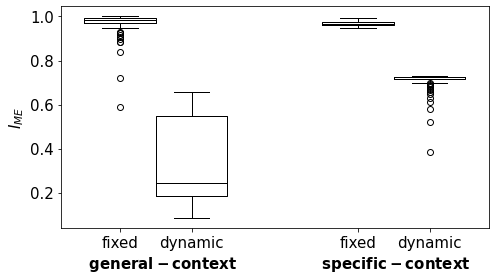

In [2]:
boxplot_ME_indices_bw(paths=['../results_fixed_lexicon/interval_15_alpha_2.5/', 
                             '../results_dynamic_lexicon/interval_20_alpha_2.5/'],
                      runs=10)

#### alpha = 5

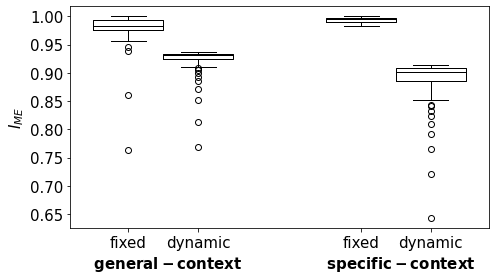

In [4]:
boxplot_ME_indices_bw(runs=10)

#### alpha = 10.0

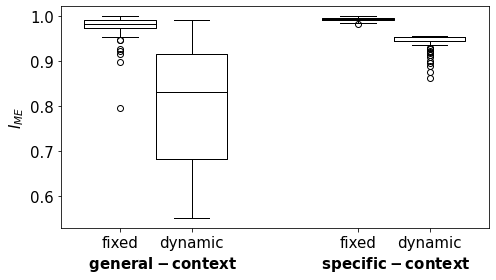

In [6]:
boxplot_ME_indices_bw(paths=['../results_fixed_lexicon/interval_15_alpha_10.0/', 
                             '../results_dynamic_lexicon/interval_15_alpha_10.0/'],
                      runs=10)

## Reward and ME bias for interval size k=15

Looking at the ME bias over time helps us to understand the impact of $\alpha$ on the dynamic lexicon. In the *general-context evaluation*, the ME index decreases if $\alpha=2.5$ or $\alpha=10.0$. While it does not increase over time in the *specific-context evaluation*, the ME index is much lower if $\alpha$ is small. 

For small $\alpha$, the agent explores a lot. While associations between words and objects that do not form a pair rapidly become zero, associations word-object pairs are not reinforced strongly (little exploitation). True associations become even less strong for infrequent word-object pairs as defined by the Zipfian input distribution. As a consequence the number of words that also have some probability for the new object under the policy increases, which leads to to decline in general-context ME index. But also in a one-on-one evaluation of target versus distractor, as in the specific-context, many of the infrequent words compete with the novel word, and specific-context ME index is low. 

For a large $\alpha$, the agent exploits a lot. While true associations become very strong, false associations keep some association strength in the lexicon. Because true associations are very strong, the context-specific ME index remains high: based on pragmatic reasoning, the distractor can easily be excluded as potential referent. 

#### alpha = 2.5

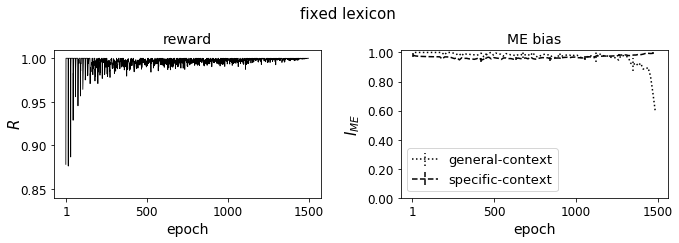

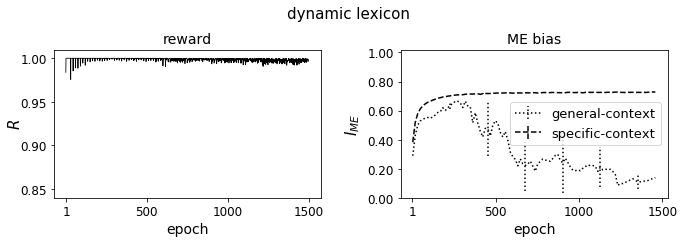

In [6]:
plot_multiple_iter_k15(alpha=2.5, runs=10, lims=[0.0,1.02])

#### alpha = 5.0

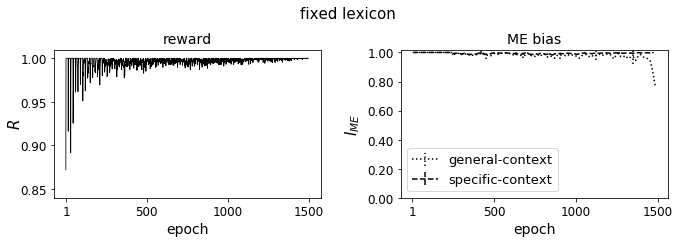

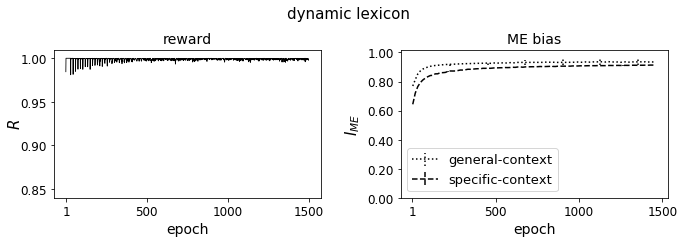

In [5]:
plot_multiple_iter_k15(alpha=5.0, runs=10, lims=[0,1.02])

#### alpha = 10.0

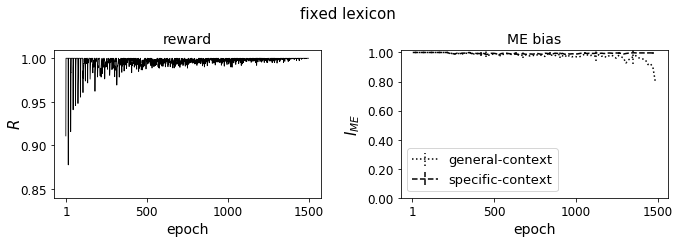

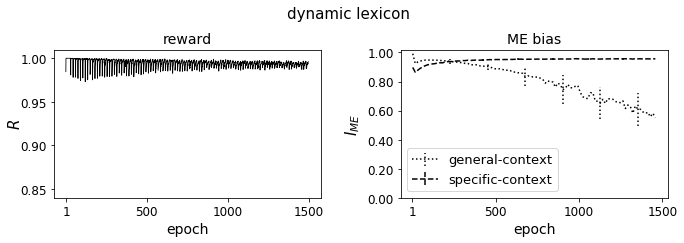

In [4]:
plot_multiple_iter_k15(alpha=10.0, runs=10, lims=[0,1.02])

## Reward and ME bias for different exposure intervals

The overall pattern that higher exposure leads to a stronger ME bias can be found across different $\alpha$ and for both implementations. Only the general-context ME index for the dynamic lexicon implementation and $\alpha=2.5$ does not follow this pattern. 

#### alpha = 2.5

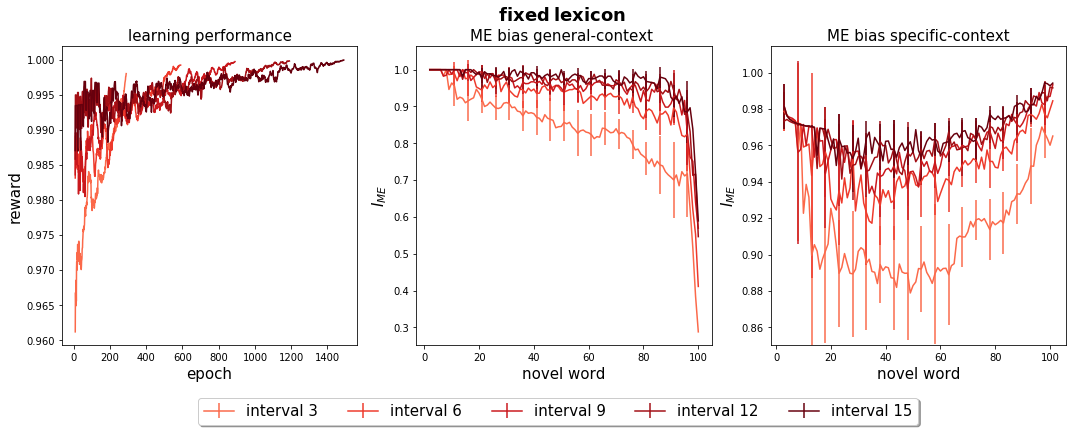

In [8]:
plot_multiple_iter(interval=(3, 6, 9, 12, 15), lexicon_type='fixed', mode='index', alpha=2.5, runs=10)

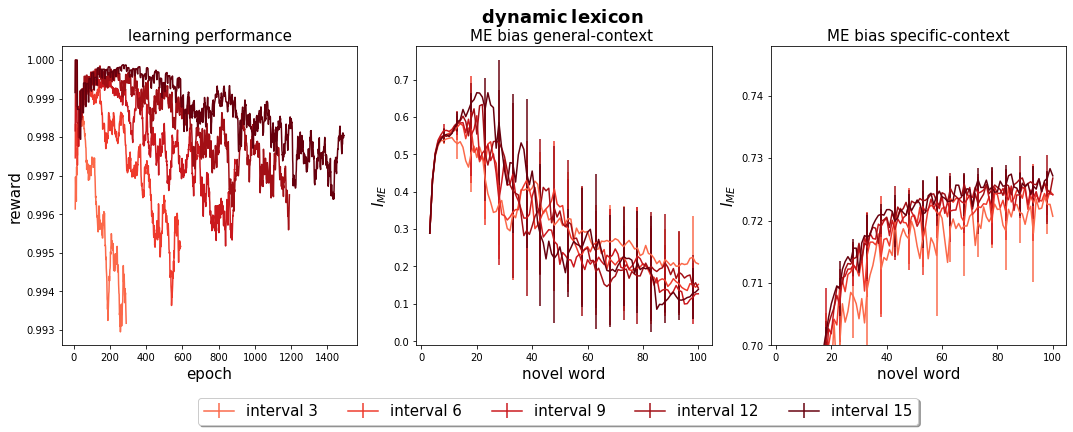

In [9]:
plot_multiple_iter(interval=(3, 6, 9, 12, 15), lexicon_type='dynamic', mode='index', alpha=2.5, runs=10)

#### alpha = 5.0

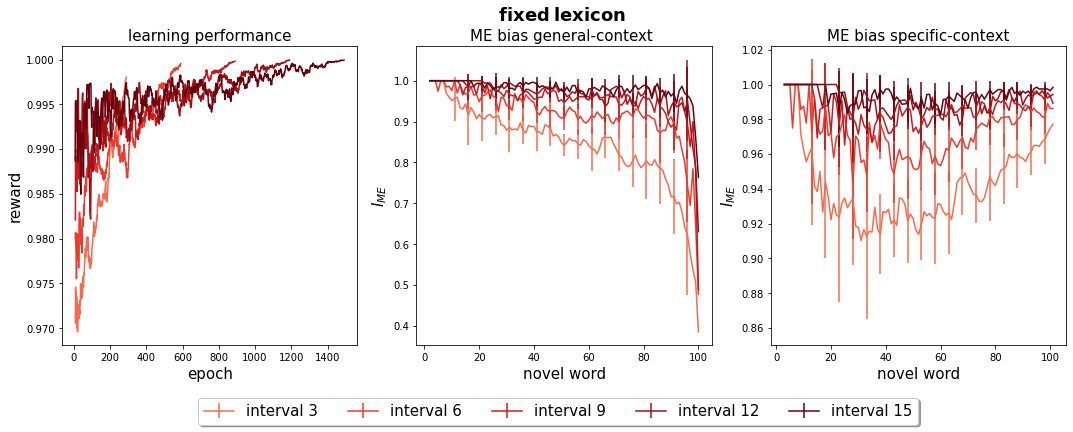

In [9]:
plot_multiple_iter(lexicon_type='fixed', mode='index', runs=10)

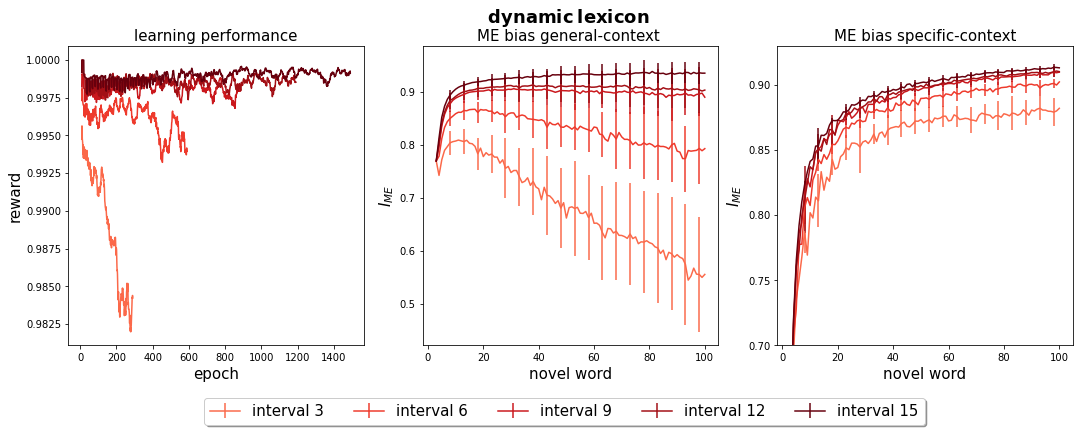

In [10]:
plot_multiple_iter(lexicon_type='dynamic', mode='index', runs=10)

#### alpha = 10

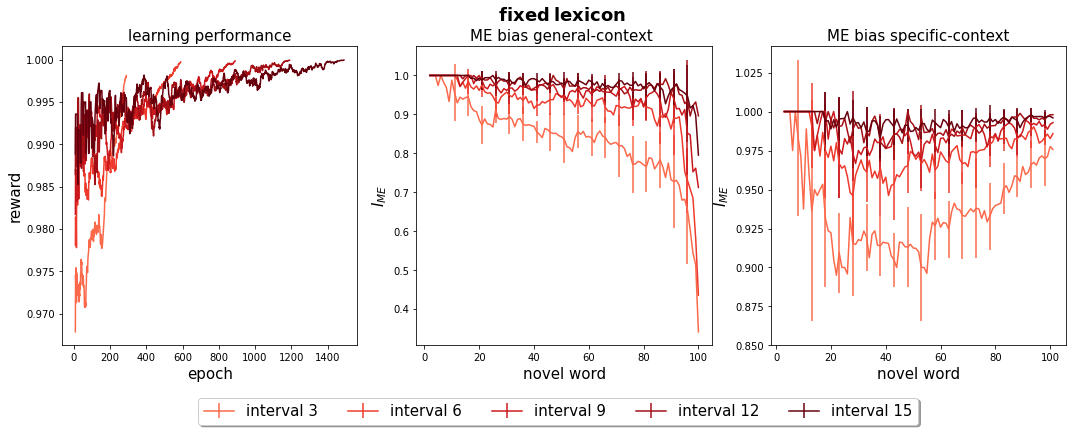

In [22]:
plot_multiple_iter(interval=(3, 6, 9, 12, 15), lexicon_type='fixed', mode='index', alpha=10.0, runs=10)

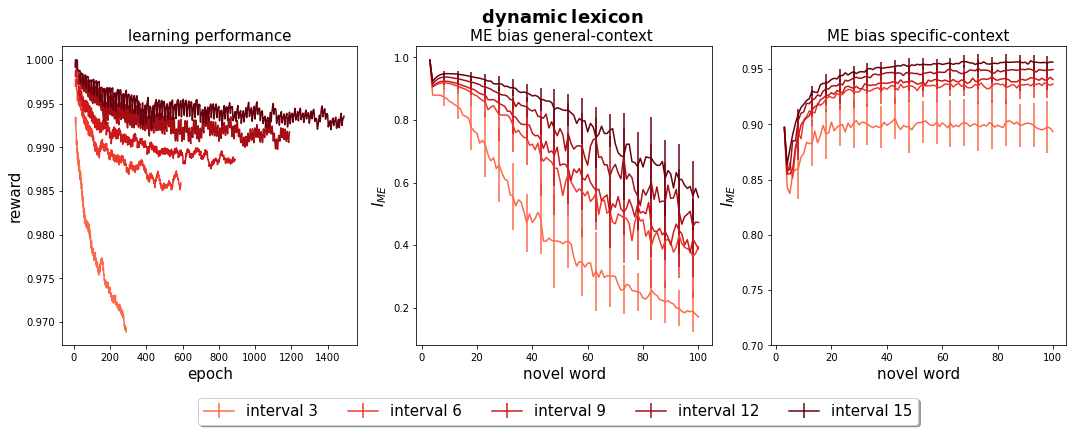

In [23]:
plot_multiple_iter(interval=(3, 6, 9, 12, 15), lexicon_type='dynamic', mode='index', alpha=10.0, runs=10)

## Learning success

In the learning success analysis, we quantify learning success rate and learning duration (or acquisition speed) depending on whether the agent has a strong or weak ME bias for a specific word, when first encountering that word. 

Agents with a dynamic lexicon have a higher learning success rate and a higher acquisition speed, if they have a strong ME bias for a word, for all values of $\alpha$ that we tested. We find the same pattern for agents with a fixed lexicon, however, for $\alpha=2.5$ and longer time spans ($20$ or $30$) they do not seem to have a higher learning rate if the ME bias was strong. We think that this is due to high learning success rates for all words within these time spans (all $>0.97$, which makes a meaningful comparison difficult. 

#### alpha = 2.5

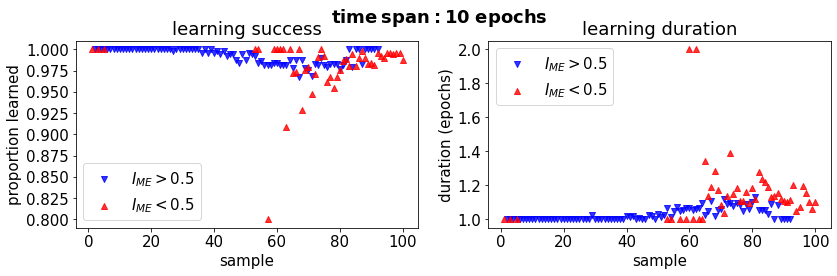

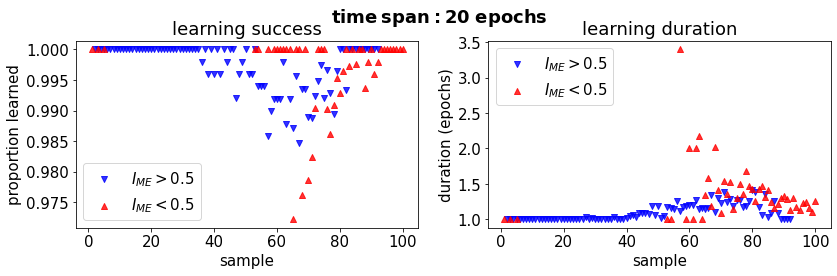

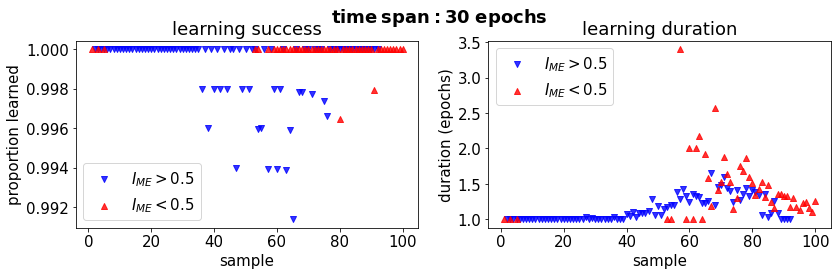

In [26]:
plot_learning_success('fixed', alpha=2.5, runs=500, smallLR=False)

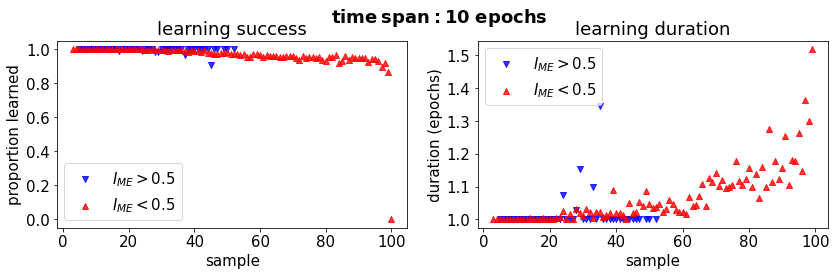

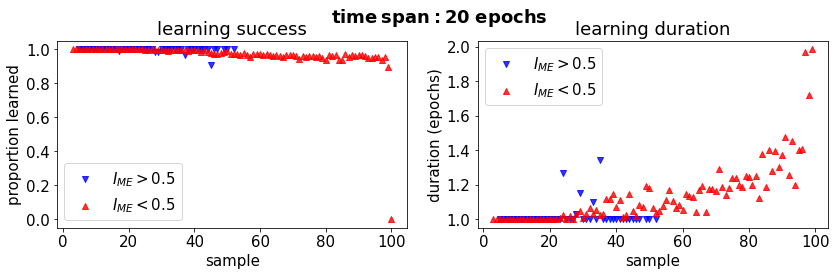

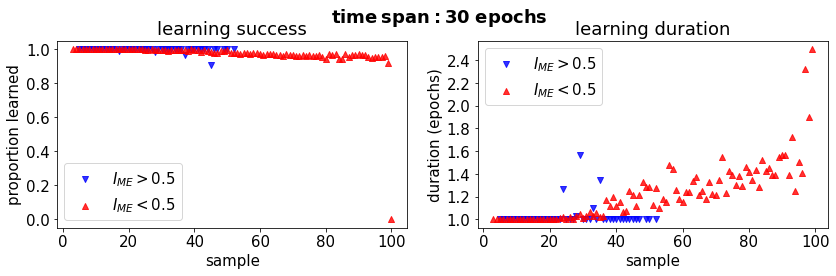

In [8]:
plot_learning_success('dynamic', alpha=2.5, runs=500)

#### alpha = 5

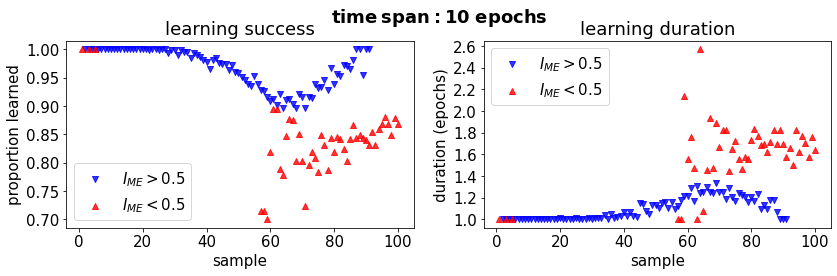

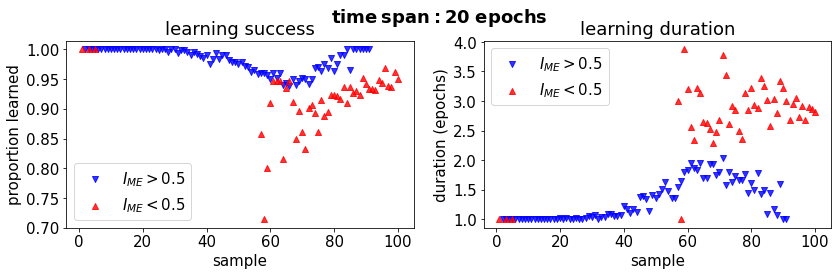

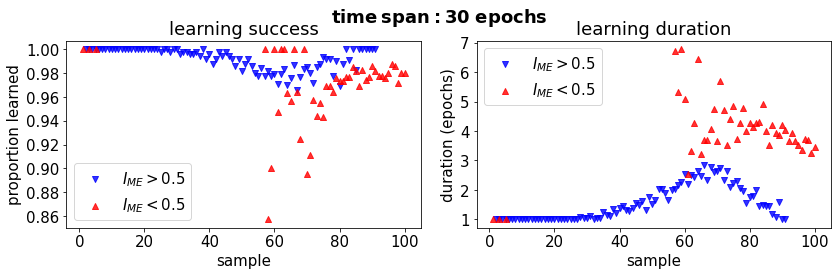

In [9]:
plot_learning_success('fixed', runs=500)

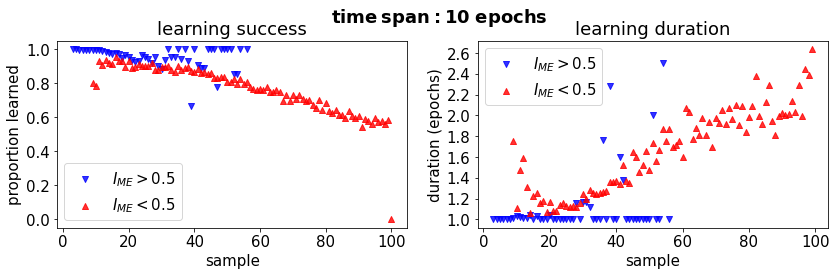

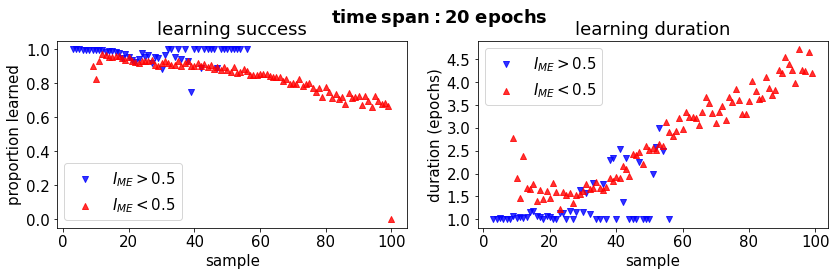

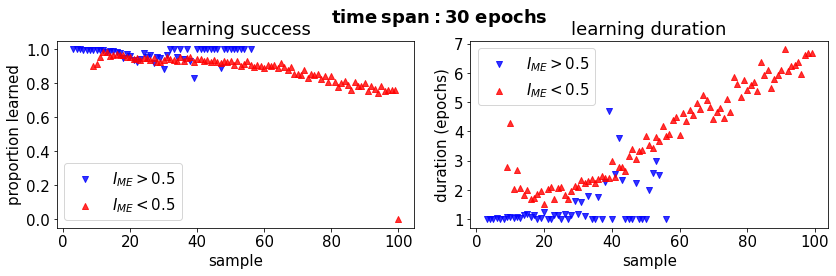

In [10]:
plot_learning_success('dynamic', runs=500)

#### alpha = 10

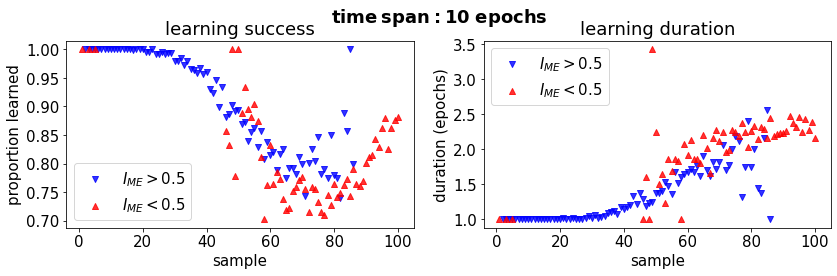

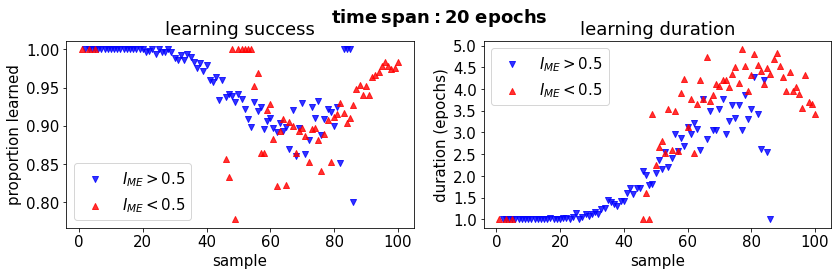

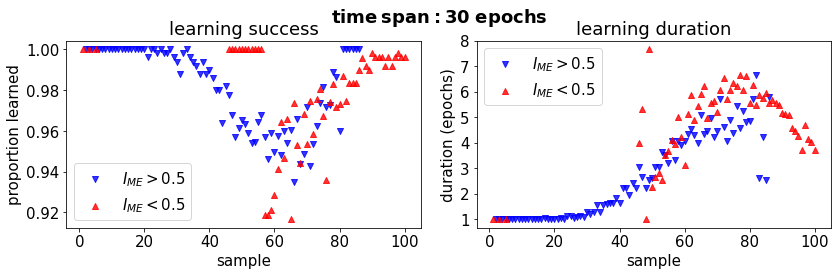

In [11]:
plot_learning_success('fixed', alpha=10.0, runs=500)

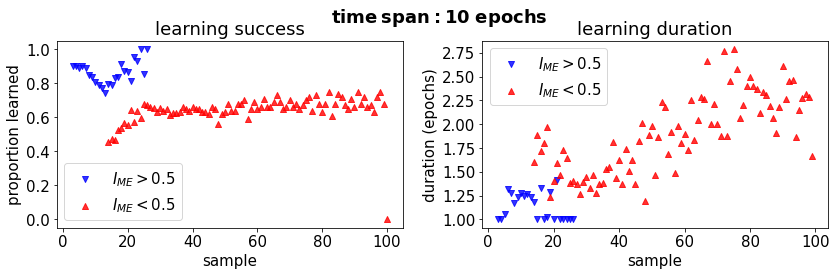

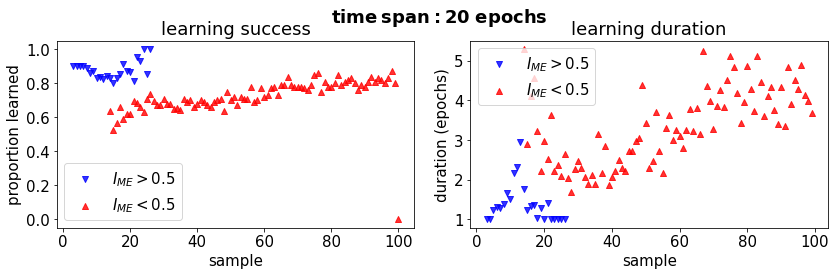

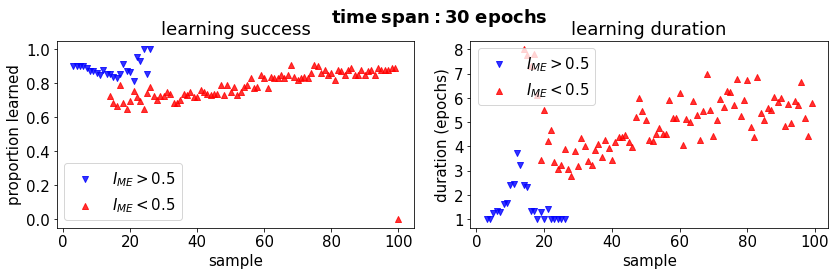

In [28]:
plot_learning_success('dynamic', alpha=10.0, runs=100)